# 财经数据分析案例————数据采集  

## 1. 获取财经数据的途径  

“巧妇难为无米之炊”，进行财经数据分析，首先要能获取到合适的财经数据。目前获取财经数据的途径一般有三种：  

* 通过授权渠道获取  
  这种方式一般是公司或组织的内部人员，或被授权对公司或组织的财经数据进行分析的人员。数据一般由该公司或组织提供。  
* 通过网络爬虫获取  
  这种方式是在法律允许的范围内，通过网络爬虫技术在Internet上爬取公开的财经数据信息。  
* 通过数据接口获取  
  通过免费或付费的财经数据平台提供的API获取相关的财经数据  

在本实例中我们只讲解通过网络爬虫获取与通过数据接口获取两种方式。

## 2. 通过数据接口获取财经数据  

通过数据接口获取财经数据是目前做财经数据分析人员常用的方法。提供财经数据的平台一般都会对他们所提供的数据做格式化以保证数据的质量，平台大多会提供可以在Python、R、Julia等语言中使用的第三方库，库中会提供访问和下载平台数据的函数、方法或对象。  

这些可以让我们在代码中调用的函数、方法、对象我们统称为**数据接口API**  

我们主要介绍两个在国内使用比较方便和普遍的数据平台：**[证券宝（Baostock）](http://baostock.com)** 和 **[Tushare数据](https://tushare.pro/)**  

### 2.1 证券宝（BaoStock）数据平台  

#### 2.1.1 平台介绍  

以下是[证券宝官方网站](http://baostock.com/)对其平台的介绍  

> **证券宝www.baostock.com是一个免费、开源的证券数据平台（无需注册）。**  
>  
> * 提供大量准确、完整的证券历史行情数据、上市公司财务数据等。  
> * 通过python API获取证券数据信息，满足量化交易投资者、数量金融爱好者、计量经济从业者数据需求。  
> * 返回的数据格式：  
>   * pandas DataFrame类型，以便于用pandas/NumPy/Matplotlib进行数据分析和可视化。  
>   * 同时支持通过BaoStock的数据存储功能，将数据全部保存到本地后进行分析。  
> * 支持语言：目前版本BaoStock.com目前只支持Python3.5及以上(暂不支持python 2.x)。  
> * 持续更新：BaoStock.com还在不断的完善和优化，后续将逐步增加港股、期货、外汇和基金等方面的金融数据，为成为一个免费金融数据平台努力。  
> * 分享优化：请通过微信、网站博客或者知乎文章等方式分享给大家，使它能在大家的使用过程中逐步得到改进与提升，以便于更好地为大家提供免费服务。  
> * 平台麦克：证券宝BaoStock.com从发布到现在，已经帮助很多用户在数据方面减轻了工作量，同时也得到很多用户的反馈。它将一如既往的以免费、开源的形式分享出来，希望给有需要的朋友带来一些帮助。  
>  

#### 2.1.2 证券宝（BaoStock）的安装  

在Python中使用BaoStock获取数据之前需要先安装第三方库BaoStock。下面是通过清华镜像安装BaoStock的命令  

> Jupyter Notebook提供的魔术命令`%pip`可以让你在Notebook的单元格中执行`pip`命令；通过在`pip`命令前加‘!’也能实现在笔记本单元格中执行终端命令的功能。  
> **官方建议：**  
>> * 如果要在笔记本单元格中使用pip命令安装第三方库，建议使用`python -m pip install`代替`pip install`  
>> * 在笔记本单元格中任何带前缀‘!’的命令都被视为终端命令，例如`!pip install <module>`、`!python -m pip install <module>`，建议使用魔术命令`%pip install <module>`代替。  
>> * 如果要将第三方库安装到conda创建的虚拟环境中，首选使用`%conda`命令。这是因为你的Jupyter kernel有可能和你终端默认激活的虚拟环境不一致！  

**个人建议：** 在终端窗口中安装第三方库，确认激活了正确的虚拟环境后用`pip`或`conda`命令进行安装。

In [ ]:
# 使用 %pip 魔术命令执行pip安装
%pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# 使用 !pip 执行pip安装
!pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# 用 %conda 命令安装
%conda install baostock

使用`pip show baostock`或`conda list baostock`可以查看已经安装的baostock库的详细信息

In [ ]:
%pip show baostock

In [ ]:
%conda list baostock

#### 2.1.3 BaoStock平台的使用  

在[证券宝官网](http://baostock.com/)有比较详细的API使用说明，我们介绍几个常用场景下通过证券宝获取数据的示例。  

证券宝提供的所有API可以用Python的dir命令查询。

In [1]:
import baostock as bs

dir(bs)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'common',
 'cons',
 'corpreport',
 'data',
 'evaluation',
 'login',
 'logout',
 'macroscopic',
 'metadata',
 'query_adjust_factor',
 'query_all_stock',
 'query_balance_data',
 'query_cash_flow_data',
 'query_deposit_rate_data',
 'query_dividend_data',
 'query_dupont_data',
 'query_forecast_report',
 'query_growth_data',
 'query_history_k_data',
 'query_history_k_data_plus',
 'query_hs300_stocks',
 'query_loan_rate_data',
 'query_money_supply_data_month',
 'query_money_supply_data_year',
 'query_operation_data',
 'query_performance_express_report',
 'query_profit_data',
 'query_required_reserve_ratio_data',
 'query_shibor_data',
 'query_stock_basic',
 'query_stock_industry',
 'query_sz50_stocks',
 'query_trade_dates',
 'query_zz500_stocks',
 'security',
 'util']

##### 1. 获取A股K线数据  
  函数：**query_history_k_data_plus()**  
  
  方法说明：通过API接口获取A股历史交易数据，可以通过参数设置获取日k线、周k线、月k线，以及5分钟、15分钟、30分钟和60分钟k线数据，适合搭配均线数据进行选股和分析。  
  
  返回类型：pandas的DataFrame类型。能获取1990-12-19至当前时间的数据；可查询不复权、前复权、后复权数据。

In [2]:
# 导入必要的库
import pandas as pd
import baostock as bs

data_path = './data/'

In [3]:
# 登陆系统
lg = bs.login()

# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success


In [4]:
# 获取沪深A股浦发银行（600000）2022年全年历史日K线数据

rs = bs.query_history_k_data_plus(
    "sh.600000",
    "date,code,open,high,low,close,volume,amount,adjustflag",
    start_date='2022-01-01', end_date='2023-01-01',
    frequency="d", adjustflag="3")

# 打印查询操作状态信息
print('query_history_k_data_plus respond error_code:' + rs.error_code)
print('query_history_k_data_plus respond  error_msg:' + rs.error_msg)

# 登出系统
bs.logout()

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
logout success!


In [5]:
type(rs)

baostock.data.resultset.ResultData

In [6]:
type(rs.get_data())

pandas.core.frame.DataFrame

In [7]:
# 将结果集转换为DataFrame
df = rs.get_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        242 non-null    object
 1   code        242 non-null    object
 2   open        242 non-null    object
 3   high        242 non-null    object
 4   low         242 non-null    object
 5   close       242 non-null    object
 6   volume      242 non-null    object
 7   amount      242 non-null    object
 8   adjustflag  242 non-null    object
dtypes: object(9)
memory usage: 17.1+ KB


In [8]:
df.head()

date       code    open    high     low   close    volume  \
0  2022-01-04  sh.600000  8.5400  8.5800  8.5200  8.5700  37707647   
1  2022-01-05  sh.600000  8.5700  8.6800  8.5600  8.6400  55459135   
2  2022-01-06  sh.600000  8.6600  8.6600  8.5600  8.5700  41031062   
3  2022-01-07  sh.600000  8.5700  8.7300  8.5700  8.7100  63018297   
4  2022-01-10  sh.600000  8.7200  8.7800  8.6600  8.7200  34055312   

           amount adjustflag  
0  322145532.4000          3  
1  478834469.9200          3  
2  352720657.0900          3  
3  546456194.3700          3  
4  296601230.4100          3

In [9]:
# 将数据写入文件，index信息不写入

df.to_csv(data_path + 'sh600000_20220101_20230101_d.csv', index=False)

In [10]:
# 将数据从文件读入，日期列作为index, 并将索引的数据类型设置为DatetimeIndex
df = pd.read_csv(data_path + 'sh600000_20220101_20230101_d.csv', index_col=0, parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2022-01-04 to 2022-12-30
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        242 non-null    object 
 1   open        242 non-null    float64
 2   high        242 non-null    float64
 3   low         242 non-null    float64
 4   close       242 non-null    float64
 5   volume      242 non-null    int64  
 6   amount      242 non-null    float64
 7   adjustflag  242 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 17.0+ KB


In [11]:
df.head()

code  open  high   low  close    volume        amount  \
date                                                                     
2022-01-04  sh.600000  8.54  8.58  8.52   8.57  37707647  3.221455e+08   
2022-01-05  sh.600000  8.57  8.68  8.56   8.64  55459135  4.788345e+08   
2022-01-06  sh.600000  8.66  8.66  8.56   8.57  41031062  3.527207e+08   
2022-01-07  sh.600000  8.57  8.73  8.57   8.71  63018297  5.464562e+08   
2022-01-10  sh.600000  8.72  8.78  8.66   8.72  34055312  2.966012e+08   

            adjustflag  
date                    
2022-01-04           3  
2022-01-05           3  
2022-01-06           3  
2022-01-07           3  
2022-01-10           3

In [12]:
df.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='date', length=242, freq=None)

**绘制日K线蜡烛图**  

* 需要的数据：每日开盘价（open）、最高价（high）、最低价（low）、收盘价（close）  
  
* 需要的第三方库：mplfinance  
  
  mplfinance（Matplotlib Finance）是一个Python库，用于绘制金融数据的图表，特别是股票图表。这个库原本是Matplotlib的一个子模块，但后来被独立出来，并进行了一系列的更新和改进。它为绘制蜡烛图、OHLC图（Open-High-Low-Close）和其它金融图表提供了一个简单而高效的接口。  

  mplfinance库需要单独安装。[mplfinance官网](https://github.com/matplotlib/mplfinance)有详细的使用教程！

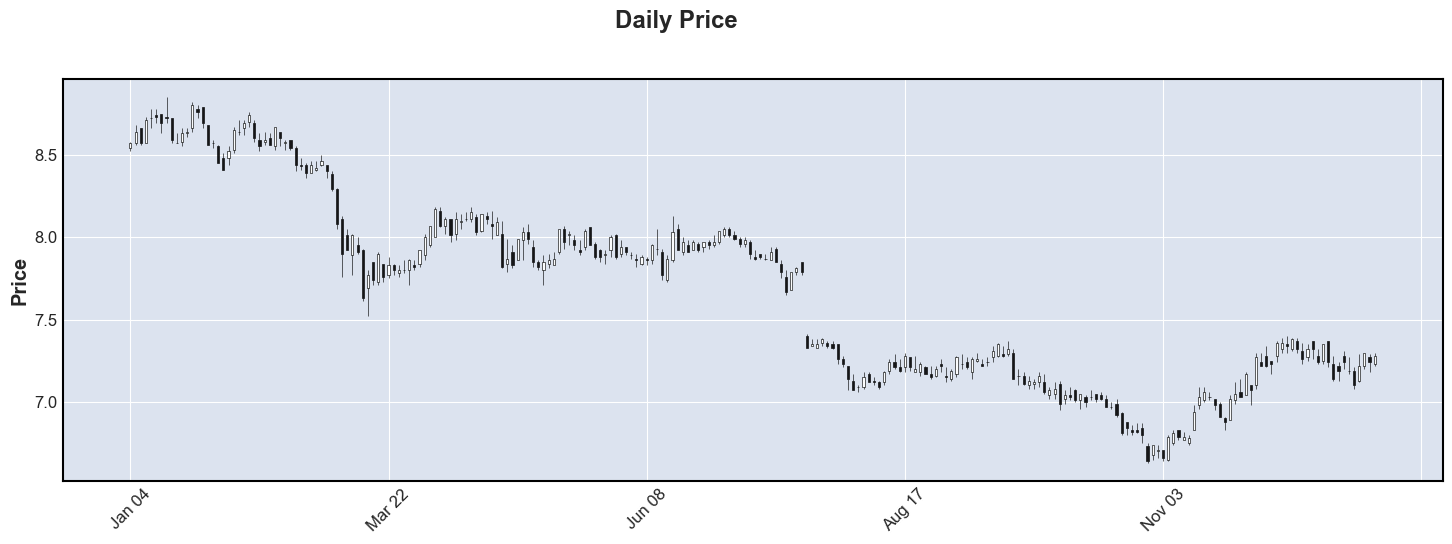

In [13]:
# 导入 mplfinance 库
import mplfinance as mpf

# 准备数据
df = df[['open', 'high', 'low', 'close']]

# 绘制蜡烛图
mpf.plot(data=df, type='candle', title='Daily Price', figratio=(10,3))

**参数含义：**  

* code：股票代码，sh或sz.+6位数字代码，或者指数代码，如：sh.601398。sh：上海；sz：深圳。此参数不可为空；  
* fields：指示简称，支持多指标输入，以半角逗号分隔，填写内容作为返回类型的列。详细指标列表见历史行情指标参数章节，日线与分钟线参数不同。此参数不可为空；  
* start：开始日期（包含），格式“YYYY-MM-DD”，为空时取2015-01-01；  
* end：结束日期（包含），格式“YYYY-MM-DD”，为空时取最近一个交易日；  
* frequency：数据类型，默认为d，日k线；d=日k线、w=周、m=月、5=5分钟、15=15分钟、30=30分钟、60=60分钟k线数据，不区分大小写；指数没有分钟线数据；周线每周最后一个交易日才可以获取，月线每月最后一个交易日才可以获取。  
* adjustflag：复权类型，默认不复权：3；1：后复权；2：前复权。已支持分钟线、日线、周线、月线前后复权。 BaoStock提供的是涨跌幅复权算法复权因子  

**返回数据说明：**  

| 参数名称    | 参数描述                                    | 算法说明                                                     |  
| ----------- | ------------------------------------------- | ------------------------------------------------------------ |  
| date        | 交易所行情日期                              |                                                              |  
| code        | 证券代码                                    |                                                              |  
| open        | 开盘价                                      |                                                              |  
| high        | 最高价                                      |                                                              |  
| low         | 最低价                                      |                                                              |  
| close       | 收盘价                                      |                                                              |  
| preclose    | 前收盘价                                    | 见表格下方详细说明                                           |  
| volume      | 成交量（累计 单位：股）                     |                                                              |  
| amount      | 成交额（单位：人民币元）                    |                                                              |  
| adjustflag  | 复权状态(1：后复权， 2：前复权，3：不复权） |                                                              |  
| turn        | 换手率                                      | [指定交易日的成交量(股)/指定交易日的股票的流通股总股数(股)]*100% |  
| tradestatus | 交易状态(1：正常交易 0：停牌）              |                                                              |  
| pctChg      | 涨跌幅（百分比）                            | 日涨跌幅=[(指定交易日的收盘价-指定交易日前收盘价)/指定交易日前收盘价]*100% |  
| peTTM       | 滚动市盈率                                  | (指定交易日的股票收盘价/指定交易日的每股盈余TTM)=(指定交易日的股票收盘价*截至当日公司总股本)/归属母公司股东净利润TTM |  
| pbMRQ       | 市净率                                      | (指定交易日的股票收盘价/指定交易日的每股净资产)=总市值/(最近披露的归属母公司股东的权益-其他权益工具) |  
| psTTM       | 滚动市销率                                  | (指定交易日的股票收盘价/指定交易日的每股销售额)=(指定交易日的股票收盘价*截至当日公司总股本)/营业总收入TTM |  
| pcfNcfTTM   | 滚动市现率                                  | (指定交易日的股票收盘价/指定交易日的每股现金流TTM)=(指定交易日的股票收盘价*截至当日公司总股本)/现金以及现金等价物净增加额TTM |  
| isST        | 是否ST股，1是，0否                          |                                                              |  

> **注意：**  
>  
> **“前收盘价”说明**：  
>  
> 证券在指定交易日行情数据的前收盘价，当日发生除权除息时，“前收盘价”不是前一天的实际收盘价，而是根据股权登记日收盘价与分红现金的数量、配送股的数里和配股价的高低等结合起来算出来的价格。  
>  
> 具体计算方法如下:  
>  
> 1. 计算除息价:  
>  
>    除息价=股息登记日的收盘价-每股所分红利现金额  
>  
> 2. 计算除权价:  
>  
>    送红股后的除权价=股权登记日的收盘价/(1+每股送红股数)  
>  
>    配股后的除权价=(股权登记日的收盘价+配股价*每股配股数)/(1+每股配股数)  
>  
> 3. 计算除权除息价  
>  
>    除权除息价=(股权登记日的收盘价-每股所分红利现金额+配股价*每股配股数)/(1+每股送红股数+每股配股数)  
>  
>    “前收盘价”由交易所计算并公布。首发日的“前收盘价”等于“首发价格”。  
>  

**历史行情指标参数**  

**日线指标参数（包含停牌证券）**  

| 参数名称    | 参数描述         | 说明                                |  
| ----------- | ---------------- | ----------------------------------- |  
| date        | 交易所行情日期   | 格式：YYYY-MM-DD                    |  
| code        | 证券代码         | 格式：sh.600000。sh：上海，sz：深圳 |  
| open        | 今开盘价格       | 精度：小数点后4位；单位：人民币元   |  
| high        | 最高价           | 精度：小数点后4位；单位：人民币元   |  
| low         | 最低价           | 精度：小数点后4位；单位：人民币元   |  
| close       | 今收盘价         | 精度：小数点后4位；单位：人民币元   |  
| preclose    | 昨日收盘价       | 精度：小数点后4位；单位：人民币元   |  
| volume      | 成交数量         | 单位：股                            |  
| amount      | 成交金额         | 精度：小数点后4位；单位：人民币元   |  
| adjustflag  | 复权状态         | 不复权、前复权、后复权              |  
| turn        | 换手率           | 精度：小数点后6位；单位：%          |  
| tradestatus | 交易状态         | 1：正常交易 0：停牌                 |  
| pctChg      | 涨跌幅（百分比） | 精度：小数点后6位                   |  
| peTTM       | 滚动市盈率       | 精度：小数点后6位                   |  
| psTTM       | 滚动市销率       | 精度：小数点后6位                   |  
| pcfNcfTTM   | 滚动市现率       | 精度：小数点后6位                   |  
| pbMRQ       | 市净率           | 精度：小数点后6位                   |  
| isST        | 是否ST           | 1是，0否                            |  

**周、月线指标参数**  

| 参数名称   | 参数描述         | 说明                                | 算法说明                                                     |  
| ---------- | ---------------- | ----------------------------------- | ------------------------------------------------------------ |  
| date       | 交易所行情日期   | 格式：YYYY-MM-DD                    |                                                              |  
| code       | 证券代码         | 格式：sh.600000。sh：上海，sz：深圳 |                                                              |  
| open       | 开盘价格         | 精度：小数点后4位；单位：人民币元   |                                                              |  
| high       | 最高价           | 精度：小数点后4位；单位：人民币元   |                                                              |  
| low        | 最低价           | 精度：小数点后4位；单位：人民币元   |                                                              |  
| close      | 收盘价           | 精度：小数点后4位；单位：人民币元   |                                                              |  
| volume     | 成交数量         | 单位：股                            |                                                              |  
| amount     | 成交金额         | 精度：小数点后4位；单位：人民币元   |                                                              |  
| adjustflag | 复权状态         | 不复权、前复权、后复权              |                                                              |  
| turn       | 换手率           | 精度：小数点后6位；单位：%          |                                                              |  
| pctChg     | 涨跌幅（百分比） | 精度：小数点后6位                   | 涨跌幅=[(区间最后交易日收盘价-区间首个交易日前收盘价)/区间首个交易日前收盘价]*100% |  

**5、15、30、60分钟线指标参数(不包含指数)**  

| 参数名称   | 参数描述       | 说明                                |  
| ---------- | -------------- | ----------------------------------- |  
| date       | 交易所行情日期 | 格式：YYYY-MM-DD                    |  
| time       | 交易所行情时间 | 格式：YYYYMMDDHHMMSSsss             |  
| code       | 证券代码       | 格式：sh.600000。sh：上海，sz：深圳 |  
| open       | 开盘价格       | 精度：小数点后4位；单位：人民币元   |  
| high       | 最高价         | 精度：小数点后4位；单位：人民币元   |  
| low        | 最低价         | 精度：小数点后4位；单位：人民币元   |  
| close      | 收盘价         | 精度：小数点后4位；单位：人民币元   |  
| volume     | 成交数量       | 单位：股                            |  
| amount     | 成交金额       | 精度：小数点后4位；单位：人民币元   |  
| adjustflag | 复权状态       | 不复权、前复权、后复权              |

In [15]:
# 5分钟线使用示例
# 从证券宝获取 宁德时代（深交所300750） 2022年全年5分钟K线历史数据

# 导入必要的库，之前的单元格中已经有导入库的命令，在这里重复是为了如果重新打开笔记本，不必去重复执行之前的单元格
import pandas as pd
import baostock as bs
import mplfinance as mpf
import os

# 获取数据文件存取路径
data_path = os.getcwd() + '/data/'
# 存储数据的文件名
filename = 'sz300750_20220101_20230101_5m.csv'

# 登录系统
lg = bs.login()

# 从证券宝读取数据
rs = bs.query_history_k_data_plus(
    code='sz.300750',
    fields='date,time,code,open,high,low,close,volume,amount,adjustflag',
    start_date='2022-01-01', end_date='2023-01-01', 
    frequency='5', adjustflag='3'
)
# 显示数据查询返回的状态信息
print(f'Code {rs.error_code}: {rs.error_msg}')
# 如果读取成功则继续处理数据，否则显示提示信息并结束
if (rs.error_code != '0'):
    print('数据读取没有成功！')
else:
    # 退出登录
    lg = bs.logout()

    # 将数据转存入DataFrame
    df = rs.get_data()

    # 将数据写入文件 
    df.to_csv(data_path + filename, index=False)
    print(f'股票数据写入文件成功！')

login success!
Code 0: success
logout success!
股票数据写入文件成功！


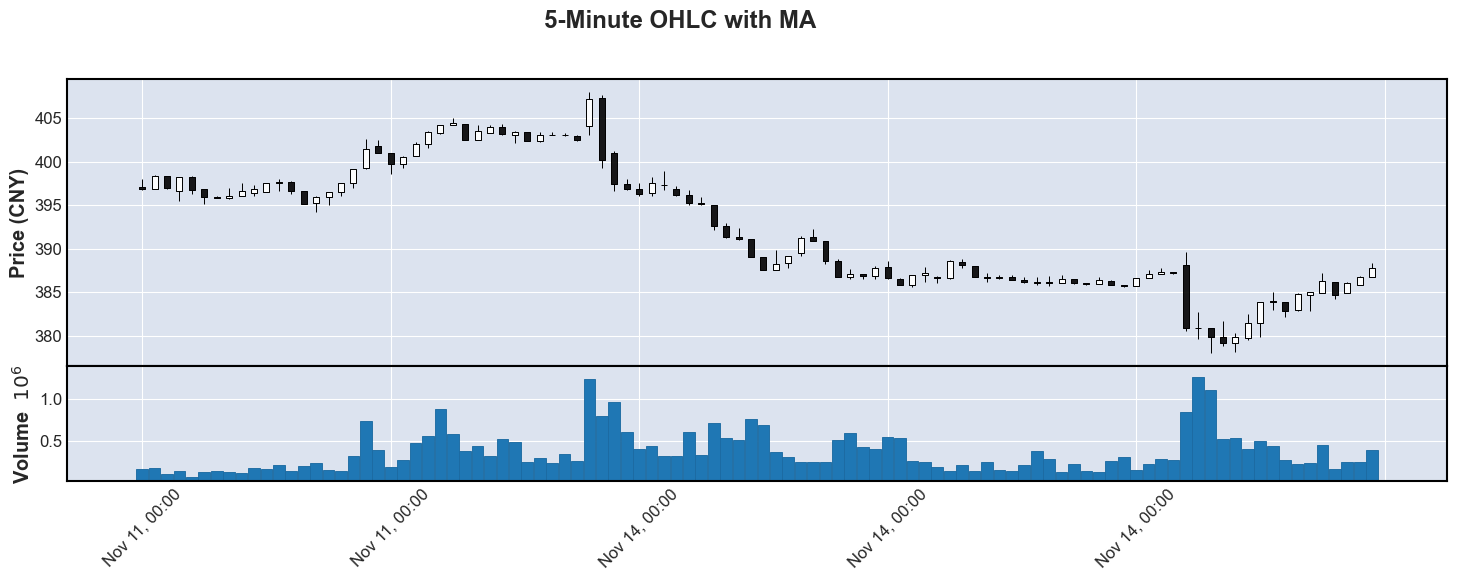

In [16]:
# 从文件读入数据，date列作为index，并对日期数据进行解析
df = pd.read_csv(data_path + filename, index_col=0, parse_dates=True)

mpf.plot(df[-100:],
         type='candle',
         title='5-Minute OHLC with MA',
         ylabel='Price (CNY)',
         volume=True,
         figratio=(10,3)
        )

##### 2. 查询股票信息  
证券宝提供了函数`query_stock_basic`可以让我们按股票代码和股票名称（支持模糊查询）查询股票信息。  

```python  
query_stock_basic(code='', code_name='')  
    A股证券基本资料  
    @param code: 证券代码，可为空  
    @param code_name: 证券名称，可为空，支持模糊查询  
```

In [ ]:
help(bs.query_stock_basic)

In [17]:
# 登录系统
lg = bs.login()

# 模糊查询股票名称中包含“生物”的股票信息
rs = bs.query_stock_basic(code_name='生物')
print(rs.error_msg)
lg = bs.logout()

stocks = rs.get_data()
stocks.info()

login success!
success
logout success!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       111 non-null    object
 1   code_name  111 non-null    object
 2   ipoDate    111 non-null    object
 3   outDate    111 non-null    object
 4   type       111 non-null    object
 5   status     111 non-null    object
dtypes: object(6)
memory usage: 5.3+ KB


In [18]:
stocks.head()

code              code_name     ipoDate outDate type status
0  of.159615  南方恒生香港上市生物科技ETF(QDII)  2022-06-17            5      1
1  of.159643         国泰国证疫苗与生物科技ETF  2022-08-10            5      1
2  of.159645         富国国证疫苗与生物科技ETF  2022-09-16            5      1
3  of.159646       华泰柏瑞国证疫苗与生物科技ETF  2022-08-11            5      1
4  of.159657         鹏华国证疫苗与生物科技ETF  2023-02-22            5      1

In [19]:
# 查询证券宝提供的所有股票信息

# 登录系统
lg = bs.login()

# 查询证券宝平台提供的所有股票基本信息
rs = bs.query_stock_basic()
print(rs.error_msg)

lg = bs.logout()

stocks = rs.get_data()
stocks.info()

login success!
success
logout success!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7379 entries, 0 to 7378
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       7379 non-null   object
 1   code_name  7379 non-null   object
 2   ipoDate    7379 non-null   object
 3   outDate    7379 non-null   object
 4   type       7379 non-null   object
 5   status     7379 non-null   object
dtypes: object(6)
memory usage: 346.0+ KB


In [20]:
# 将获得的数据写入文件
stocks.to_csv(data_path + 'all_stock_basic.csv', index=False)

In [21]:
# 通过下面的代码我们可以查看证券宝主要包含了哪些股票和基金的信息
stockCode = stocks['code'].str[0:2]
stockCode.value_counts()
# 通过输出结果，我们可以看到，并没有包含北交所的股票信息

code
sz    3659
sh    2920
of     800
Name: count, dtype: int64

In [22]:
# 登录系统
lg = bs.login()

# 查询北交所股票 鼎智科技（873593）的基本信息
rs = bs.query_stock_basic(code_name='鼎智科技')
print(rs.error_msg)
lg = bs.logout()

stock_list = []
while (rs.error_code == '0') and rs.next():
    stock_list.append(rs.get_row_data())

stocks = pd.DataFrame(data=stock_list, columns=rs.fields)
stocks
# 通过输出我们可以看到证券宝不包含北交所上市的股票信息

login success!
success
logout success!


Empty DataFrame
Columns: [code, code_name, ipoDate, outDate, type, status]
Index: []

##### 3. 获取上市公司季频财务指标数据  

证券宝提供了上市公司自2007年以来公开的季频财务指标信息。通过证券宝提供的一系列函数可以查询对应的财务指标。  

* 季频盈利能力：query_profit_data()  
* 季频营运能力：query_operation_data()  
* 季频成长能力：query_growth_data()  
* 季频偿债能力：query_balance_data()  
* 季频现金流量：query_cash_flow_data()  
* 季频杜邦指数：query_dupont_data()  
* 季频公司业绩快报：query_performance_express_report()  
* 季频公司业绩预告：query_forecast_report()  

篇幅关系，我们这里只示例说明如何获取季频盈利能力数据，其它查询接口的使用，大家可以通过证券宝官网的[帮助文档](http://baostock.com/baostock/index.php/Python_API%E6%96%87%E6%A1%A3)进行查看。  

**季频盈利能力：query_profit_data()**  

方法说明：通过API接口获取季频盈利能力信息，可以通过参数设置获取对应年份、季度数据，提供2007年至今数据。  

**参数含义：**  

* code：股票代码，sh或sz.+6位数字代码，或者指数代码，如：sh.601398。sh：上海；sz：深圳。此参数不可为空；  
* year：统计年份，为空时默认当前年；  
* quarter：统计季度，可为空，默认当前季度。不为空时只有4个取值：1，2，3，4。  
  
**返回数据示例**  

| code      | pubDate    | statDate   | roeAvg   | npMargin | gpMargin | netProfit          | epsTTM   | MBRevenue          | totalShare     | liqaShare      |  
| --------- | ---------- | ---------- | -------- | -------- | -------- | ------------------ | -------- | ------------------ | -------------- | -------------- |  
| sh.600000 | 2017-08-30 | 2017-06-30 | 0.074617 | 0.342179 |          | 28522000000.000000 | 1.939029 | 83354000000.000000 | 28103763899.00 | 28103763899.00 |  

**参数说明**  

| 参数名称   | 参数描述                                             | 算法说明                                                     |  
| ---------- | ---------------------------------------------------- | ------------------------------------------------------------ |  
| code       | 证券代码                                             |                                                              |  
| pubDate    | 公司发布财报的日期                                   |                                                              |  
| statDate   | 财报统计的季度的最后一天, 比如2017-03-31, 2017-06-30 |                                                              |  
| roeAvg     | 净资产收益率(平均)(%)                                | 归属母公司股东净利润/[(期初归属母公司股东的权益+期末归属母公司股东的权益)/2]*100% |  
| npMargin   | 销售净利率(%)                                        | 净利润/营业收入*100%                                         |  
| gpMargin   | 销售毛利率(%)                                        | 毛利/营业收入*100%=(营业收入-营业成本)/营业收入*100%         |  
| netProfit  | 净利润(元)                                           |                                                              |  
| epsTTM     | 每股收益                                             | 归属母公司股东的净利润TTM/最新总股本                         |  
| MBRevenue  | 主营营业收入(元)                                     |                                                              |  
| totalShare | 总股本                                               |                                                              |  
| liqaShare  | 流通股本                                             |                                                              |

In [1]:
# 获取工商银行 2018年至2022年的季频盈利能力数据

# 导入必要的库，这里重复导入的原因前面已经解释过，不再赘述
import pandas as pd
import baostock as bs
import matplotlib.pyplot as plt

# 登录系统
lg = bs.login()

# 查询工商银行的股票代码
rs = bs.query_stock_basic(code_name='工商银行')
print(rs.error_msg)

# 获取工商银行股票代码
code = (rs.get_data()).iloc[0, 0]

profit_df = pd.DataFrame()
# 查询工商银行2018年至2022年季频盈利能力信息
for y in range(2018, 2023):
    for q in range(1, 5):
        rs_profit = bs.query_profit_data(
            code=code,
            year=y,
            quarter=q
        )
        if (rs_profit.error_code != '0'):
            print(rs_profit.error_msg)
        else:
            df = rs_profit.get_data()
            profit_df = pd.concat([profit_df, df], ignore_index=True)
            
# 退出登录
lg = bs.logout()

profit_df.info()

login success!
success
logout success!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        20 non-null     object
 1   pubDate     20 non-null     object
 2   statDate    20 non-null     object
 3   roeAvg      20 non-null     object
 4   npMargin    20 non-null     object
 5   gpMargin    20 non-null     object
 6   netProfit   20 non-null     object
 7   epsTTM      20 non-null     object
 8   MBRevenue   20 non-null     object
 9   totalShare  20 non-null     object
 10  liqaShare   20 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


In [33]:
# 绘制财务指标图表
# 考虑到上面的各列数据都被识别为 object类型，做数据转换过于繁琐
# 所以还是采取将数据写入文件，然后再从文件读取数据的办法，让Pandas自动识别正确的数据类型，如有必要再做微调

# 将数据写入文件
profit_df.to_csv(data_path + 'gonghang_profit_2018_2022.csv', index=False)

# 读入数据，并将 statDate 列设为索引，并进行日期数据解析
profit_df = pd.read_csv(data_path + 'gonghang_profit_2018_2022.csv', index_col=2, parse_dates=True)
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-03-31 to 2022-12-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        20 non-null     object 
 1   pubDate     20 non-null     object 
 2   roeAvg      20 non-null     float64
 3   npMargin    20 non-null     float64
 4   gpMargin    0 non-null      float64
 5   netProfit   20 non-null     float64
 6   epsTTM      20 non-null     float64
 7   MBRevenue   10 non-null     float64
 8   totalShare  20 non-null     float64
 9   liqaShare   20 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.7+ KB


In [42]:
profit_df = pd.read_csv(data_path + 'gonghang_profit_2018_2022.csv', index_col=2, parse_dates=True)

In [43]:
# gpMargin(销售毛利率)全为空，pubDate列不需要，删除它们
profit_df.drop(columns=['pubDate', 'gpMargin'], inplace=True)

profit_df.head()

code    roeAvg  npMargin     netProfit    epsTTM  \
statDate                                                            
2018-03-31  sh.601398  0.036661  0.400962  7.906900e+10  0.811055   
2018-06-30  sh.601398  0.074519  0.414651  1.606570e+11  0.823487   
2018-09-30  sh.601398  0.109059  0.416113  2.401200e+11  0.835218   
2018-12-31  sh.601398  0.133562  0.386052  2.987230e+11  0.835215   
2019-03-31  sh.601398  0.034575  0.351124  8.269000e+10  0.844202   

               MBRevenue    totalShare     liqaShare  
statDate                                              
2018-03-31           NaN  3.564063e+11  2.696122e+11  
2018-06-30  3.874510e+11  3.564063e+11  2.696122e+11  
2018-09-30           NaN  3.564063e+11  2.696122e+11  
2018-12-31  7.737890e+11  3.564063e+11  2.696122e+11  
2019-03-31           NaN  3.564063e+11  2.696122e+11

In [44]:
# 确认数据按照财报统计日期排好序
profit_df.sort_index(inplace=True)

In [40]:
profit_df.index

DatetimeIndex(['2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', name='statDate', freq=None)

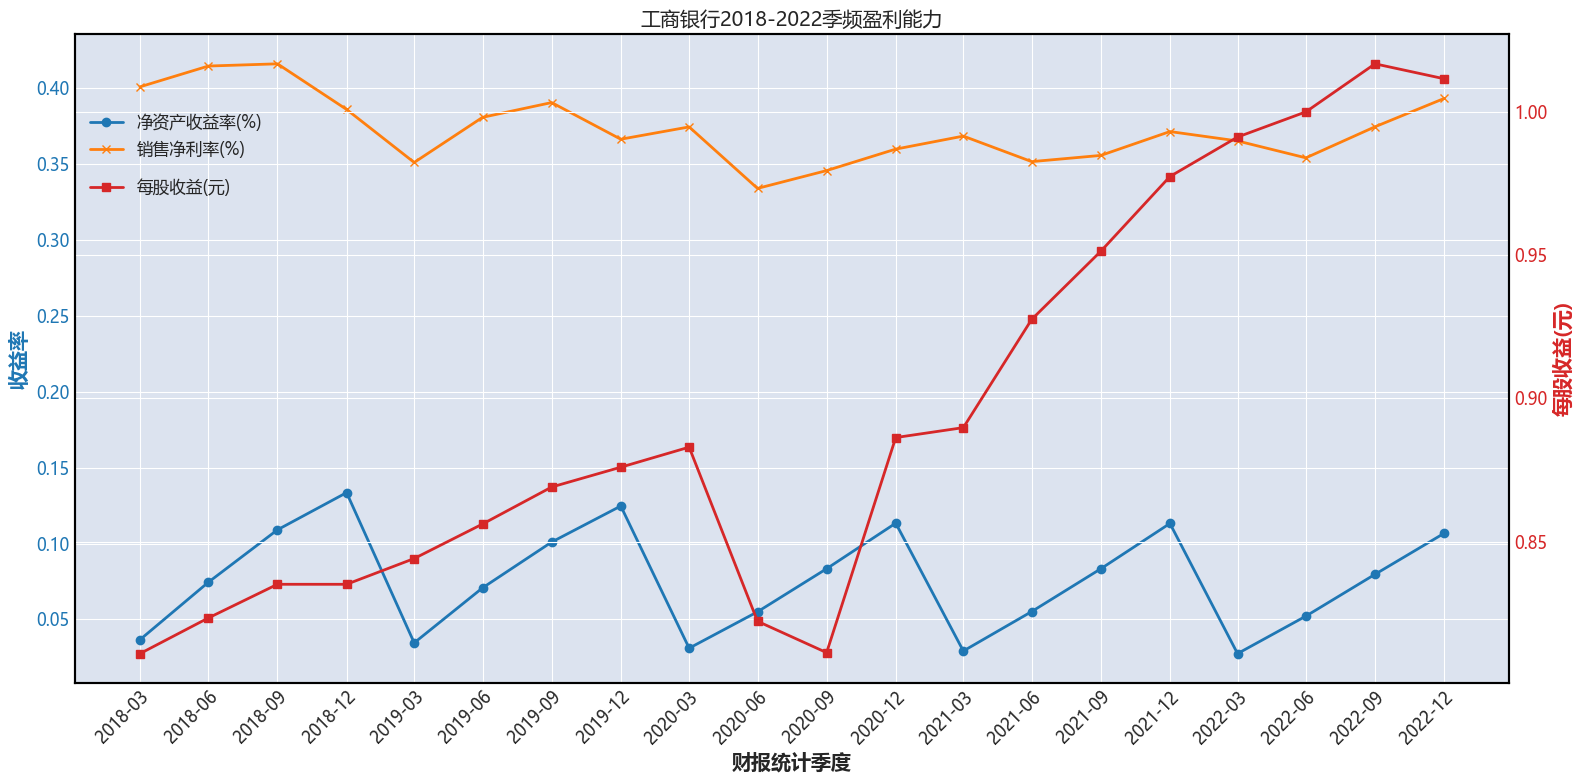

In [76]:
# 设置matplotlib的相关参数，让matplotlib支持中文
plt.rc("font", family='Microsoft YaHei')  # 设置字体为 微软雅黑
plt.rc('axes', unicode_minus=False)       # 设置正常显示负号

# 创建一个新的图形
fig, ax1 = plt.subplots(figsize=(16, 8))
X = profit_df.index
# 绘制净资产收益率、销售净利率
ax1.set_xlabel('财报统计季度')
ax1.set_ylabel('收益率', color='tab:blue')
ax1.plot(X, profit_df['roeAvg'], color='tab:blue', marker='o', label='净资产收益率(%)')
ax1.plot(X, profit_df['npMargin'], color='tab:orange', marker='x', label='销售净利率(%)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 创建第二个Y轴，单位：元。用于绘制每股收益曲线
ax2 = ax1.twinx()
ax2.set_ylabel('每股收益(元)', color='tab:red')
ax2.plot(X, profit_df['epsTTM'], color='tab:red', marker='s', label='每股收益(元)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 添加图例
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.8))

# 显示图形
plt.title('工商银行2018-2022季频盈利能力')

# 下面这句下旋转x轴标签的语句在以前的版本中是可以生效的
# 但是在当前的版本中只有在只包含一个y轴的情况下才生效。我当前的matplotlib版本是3.8.0版
# plt.xticks(rotation=45, ticks=X)  # 旋转x轴标签以改善可读性

# 用下面两行代码实现了在有两个y轴的情况下旋转X轴标签生效
ax1.set_xticks(X, labels=X.strftime('%Y-%m'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.grid(True)
plt.tight_layout()  # 自动调整布局以防止重叠
plt.show()

In [36]:
# 查询当前系统所有matplotlib支持的字体
from matplotlib.font_manager import FontManager
# import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Agency FB
	Algerian
	Arial
	Arial Rounded MT Bold
	Bahnschrift
	Baskerville Old Face
	Bauhaus 93
	Bell MT
	Berlin Sans FB
	Berlin Sans FB Demi
	Bernard MT Condensed
	Blackadder ITC
	Bodoni MT
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Britannic Bold
	Broadway
	Brush Script MT
	Calibri
	Californian FB
	Calisto MT
	Cambria
	Candara
	Castellar
	Centaur
	Century
	Century Gothic
	Century Schoolbook
	Chiller
	Colonna MT
	Comic Sans MS
	Consolas
	Constantia
	Cooper Black
	Copperplate Gothic Bold
	Copperplate Gothic Light
	Corbel
	Courier New
	Curlz MT
	DIN Next LT Pro
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	DengXian
	Dubai
	Ebrima
	Edwardian Script ITC
	Elephant
	Engravers MT
	Eras Bold ITC
	Eras Demi ITC
	Eras Light ITC
	Eras Medium ITC
	FZCuHeiSongS-B-GB
	FZDocXiaoBiaoSong
	FZShuTi
	FZXiaoBiaoSong-B05S
	FZYaoTi
	FangSong
	FangSong_GB2312
	Felix Titling
	Footlight MT

##### 其它数据  

* **交易日查询：query_trade_dates()**  
  
  **方法说明：**通过API接口获取股票交易日信息，可以通过参数设置获取起止年份数据，提供上交所1990-今年数据。  

* **存款利率：query_deposit_rate_data()**  
  
  **方法说明：**通过API接口获取存款利率，可以通过参数设置获取对应起止日期的数据。  

* **贷款利率：query_loan_rate_data()**  

  方法说明：通过API接口获取贷款利率，可以通过参数设置获取对应起止日期的数据。  

* 通过API接口`query_history_k_data_plus()`获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据。  
  
* **货币供应量：query_money_supply_data_month()**  
  
  **方法说明：**通过API接口获取货币供应量，可以通过参数设置获取对应起止日期的数据。  

**…… ……**  

更多信息和数据的获取方法请查看[官网文档](http://baostock.com/baostock/index.php/%E9%A6%96%E9%A1%B5)  


### 2.2 Tushare pro平台的使用  

#### 2.2.1 平台介绍  

[Tushare pro](https://tushare.pro/)是在之前的[Tushare](http://tushare.org/)平台上发展而来，中文名称：“**挖地兔**”。根据网站官方公布的消息，旧版Tushare数据主要通过网络爬取获得，维护团队已经逐步停止了对旧版数据的更新。新版的Tushare pro提供的不再是直接从互联网抓取，而是通过社区的采集和整理存入数据库经过质量控制后的数据。数据内容将扩大到包含股票、基金、期货、债券、外汇、行业大数据，同时包括了数字货币行情等区块链数据的全数据品类的金融大数据平台，为各类金融投资和研究人员提供适用的数据和工具。  

Tushare pro采用注册用户积分制，用户注册账号后会有初始积分，不同档次的积分拥有不同的数据查询权限和查询频次。  

[注册链接](https://tushare.pro/register?reg=501287 )（通过此链接每注册一个用户，我作为推荐者可以获得50积分）  

更详细的积分政策可以查看[官网文档——平台积分](https://tushare.pro/document/1?doc_id=13)。

#### 2.2.2 Tushare pro的安装  

通过命令：  

```shell  
pip install tushare -i https://pypi.tuna.tsinghua.edu.cn/simple  
```

Tushare pro 依赖pandas和lxml库。使用pip安装时会检查是否满足依赖，自动安装缺少的第三方库。

#### 2.2.3 Tushare平台使用  

Tushare平台提供了丰富的数据接口，可以获取丰富的财经数据。具体信息可以查阅[官方文档-数据接口](https://tushare.pro/document/2)  

查询数据首先要获得平台的**token**，这个可以登录平台后在个人中心查看和获取。  

下面示例涉及的查询，部分操作由于权限原因无法执行，更多的数据查询接口操作请通过上面提供的[链接](https://tushare.pro/document/2)查看官方文档  

##### 1. 设置token  

可以使用`ts.set_token('your token here')`方法设置token，此方法只需要在第一次或者token失效后调用，完成调取tushare数据凭证的设置，正常情况下不需要重复设置。  

若方法ts.set_token('your token')无效或不想保存token到本地，也可以在初始化接口时使用`ts.pro_api('your token')`直接设置token。这种方式，需要每次初始化时都要设置token。

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

# 设置数据存取路径
import os
data_path = os.getcwd() + '/data/'
print(data_path)

/home/mw/project/data/


In [2]:
# 设置token
# 使用set_token()方法设置
ts.set_token('your token')
# 此方法只需要在第一次或者token失效后调用，完成调取tushare数据凭证的设置，正常情况下不需要重复设置。也可以忽略此步骤，直接用pro_api('your token')完成初始化。

# 若方法ts.set_token('your token')无效或不想保存token到本地，也可以在初始化接口里直接设置token
# pro = ts.pro_api('your token')

##### 2. 初始化Tushare pro接口

In [2]:
# 初始化pro接口
ts_pro = ts.pro_api()

##### 3. 获取股票基础列表  

在Tushare数据接口里，股票代码参数都叫`ts_code`，每种股票代码都有规范的后缀。  

| 交易所名称     | 交易所代码 | 股票代码后缀 | 备注                            |  
| :------------- | :--------- | :----------- | :------------------------------ |  
| 上海证券交易所 | SSE        | .SH          | 600000.SH(股票) 000001.SH(指数) |  
| 深圳证券交易所 | SZSE       | .SZ          | 000001.SZ(股票) 399005.SZ(指数) |  
| 北京证券交易所 | BSE        | .BJ          | 8和4开头的股票                  |  
| 香港证券交易所 | HKEX       | .HK          | 00001.HK                        |  

* **接口：** stock_basic，可以通过[**数据工具**](https://tushare.pro/webclient/)调试和查看数据  
* **描述：** 获取基础信息数据，包括股票代码、名称、上市日期、退市日期等  
* **积分：** 2000积分起  

**输入参数**  

| 名称        | 类型 | 必选 | 描述                                       |  
| :---------- | :--- | :--- | :----------------------------------------- |  
| ts_code     | str  | N    | TS股票代码                                 |  
| name        | str  | N    | 名称                                       |  
| market      | str  | N    | 市场类别 （主板/创业板/科创板/CDR/北交所） |  
| list_status | str  | N    | 上市状态 L上市 D退市 P暂停上市，默认是L    |  
| exchange    | str  | N    | 交易所 SSE上交所 SZSE深交所 BSE北交所      |  
| is_hs       | str  | N    | 是否沪深港通标的，N否 H沪股通 S深股通      |  

**输出参数**  

| 名称         | 类型 | 默认显示 | 描述                                  |  
| :----------- | :--- | :------- | :------------------------------------ |  
| ts_code      | str  | Y        | TS代码                                |  
| symbol       | str  | Y        | 股票代码                              |  
| name         | str  | Y        | 股票名称                              |  
| area         | str  | Y        | 地域                                  |  
| industry     | str  | Y        | 所属行业                              |  
| fullname     | str  | N        | 股票全称                              |  
| enname       | str  | N        | 英文全称                              |  
| cnspell      | str  | N        | 拼音缩写                              |  
| market       | str  | Y        | 市场类型（主板/创业板/科创板/CDR）    |  
| exchange     | str  | N        | 交易所代码                            |  
| curr_type    | str  | N        | 交易货币                              |  
| list_status  | str  | N        | 上市状态 L上市 D退市 P暂停上市        |  
| list_date    | str  | Y        | 上市日期                              |  
| delist_date  | str  | N        | 退市日期                              |  
| is_hs        | str  | N        | 是否沪深港通标的，N否 H沪股通 S深股通 |  
| act_name     | str  | N        | 实控人名称                            |  
| act_ent_type | str  | N        | 实控人企业性质                        |

In [4]:
#查询当前所有正常上市交易的股票列表
data = ts_pro.stock_basic(exchange='', list_status='L', fields='ts_code, symbol, exchange, name, area, industry, list_date')

# 或者
# 查询当前所有正常上市交易的股票列表
#data = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,exchange,name,area,industry,list_date')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ts_code    5294 non-null   object
 1   symbol     5294 non-null   object
 2   name       5294 non-null   object
 3   area       5294 non-null   object
 4   industry   5294 non-null   object
 5   exchange   5294 non-null   object
 6   list_date  5294 non-null   object
dtypes: object(7)
memory usage: 289.6+ KB


In [6]:
data.head()

ts_code  symbol  name area industry exchange list_date
0  000001.SZ  000001  平安银行   深圳       银行     SZSE  19910403
1  000002.SZ  000002   万科A   深圳     全国地产     SZSE  19910129
2  000004.SZ  000004  国华网安   深圳     软件服务     SZSE  19910114
3  000005.SZ  000005  ST星源   深圳     环境保护     SZSE  19901210
4  000006.SZ  000006  深振业A   深圳     区域地产     SZSE  19920427

In [7]:
data.to_csv(data_path + 'AllStock_in_Tushare_pro.csv', index=False)

##### 4. 获取交易日历  

- **接口：** trade_cal，可以通过[**数据工具**](https://tushare.pro/webclient/)调试和查看数据。  
- **描述：** 获取各大交易所交易日历数据,默认提取的是上交所  
- **积分：** 需2000积分  

**输入参数**  

| 名称       | 类型 | 必选 | 描述                                                         |  
| :--------- | :--- | :--- | :----------------------------------------------------------- |  
| exchange   | str  | N    | 交易所 SSE上交所,SZSE深交所,CFFEX 中金所,SHFE 上期所,CZCE 郑商所,DCE 大商所,INE 上能源 |  
| start_date | str  | N    | 开始日期 （格式：YYYYMMDD 下同）                             |  
| end_date   | str  | N    | 结束日期                                                     |  
| is_open    | str  | N    | 是否交易 '0'休市 '1'交易                                     |  

**输出参数**  

| 名称          | 类型 | 默认显示 | 描述                        |  
| :------------ | :--- | :------- | :-------------------------- |  
| exchange      | str  | Y        | 交易所 SSE上交所 SZSE深交所 |  
| cal_date      | str  | Y        | 日历日期                    |  
| is_open       | str  | Y        | 是否交易 0休市 1交易        |  
| pretrade_date | str  | Y        | 上一个交易日                |

In [11]:
# 查询2018年全年的交易日信息
df = ts_pro.trade_cal(exchange='', start_date='20180101', end_date='20181231')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   exchange       365 non-null    object
 1   cal_date       365 non-null    object
 2   is_open        365 non-null    int64 
 3   pretrade_date  365 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.5+ KB


##### 5. 日线行情数据  

**A股日线行情**  

- **接口：** daily，可以通过[**数据工具**](https://tushare.pro/webclient/)调试和查看数据  
- **数据说明：** 交易日每天15点～16点之间入库。本接口是未复权行情，停牌期间不提供数据  
- **调取说明：** 120积分每分钟内最多调取500次，每次6000条数据，相当于单次提取23年历史  
- **描述：** 获取股票行情数据，或通过[**通用行情接口**](https://tushare.pro/document/2?doc_id=109)获取数据，包含了前后复权数据  

**输入参数**  

| 名称       | 类型 | 必选 | 描述                                       |  
| :--------- | :--- | :--- | :----------------------------------------- |  
| ts_code    | str  | N    | 股票代码（支持多个股票同时提取，逗号分隔） |  
| trade_date | str  | N    | 交易日期（YYYYMMDD）                       |  
| start_date | str  | N    | 开始日期(YYYYMMDD)                         |  
| end_date   | str  | N    | 结束日期(YYYYMMDD)                         |  

**注：日期都填YYYYMMDD格式，比如20181010**  

**输出参数**  

| 名称       | 类型  | 描述                                                         |  
| :--------- | :---- | :----------------------------------------------------------- |  
| ts_code    | str   | 股票代码                                                     |  
| trade_date | str   | 交易日期                                                     |  
| open       | float | 开盘价                                                       |  
| high       | float | 最高价                                                       |  
| low        | float | 最低价                                                       |  
| close      | float | 收盘价                                                       |  
| pre_close  | float | 昨收价(前复权)                                               |  
| change     | float | 涨跌额                                                       |  
| pct_chg    | float | 涨跌幅 （未复权，如果是复权请用 [通用行情接口](https://tushare.pro/document/2?doc_id=109) ） |  
| vol        | float | 成交量 （手）                                                |  
| amount     | float | 成交额 （千元）                                              |  

行情数据还提供了**周线（`weekly`）**、**月线（`monthly`）**行情的查询。此外还有功能最为强大的通用行情接口

In [9]:
# 单只股票
df1 = ts_pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     13 non-null     object 
 1   trade_date  13 non-null     object 
 2   open        13 non-null     float64
 3   high        13 non-null     float64
 4   low         13 non-null     float64
 5   close       13 non-null     float64
 6   pre_close   13 non-null     float64
 7   change      13 non-null     float64
 8   pct_chg     13 non-null     float64
 9   vol         13 non-null     float64
 10  amount      13 non-null     float64
dtypes: float64(9), object(2)
memory usage: 1.2+ KB


In [10]:
# 多只股票
df2 = ts_pro.daily(ts_code='000001.SZ,600000.SH', start_date='20180701', end_date='20180718')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     26 non-null     object 
 1   trade_date  26 non-null     object 
 2   open        26 non-null     float64
 3   high        26 non-null     float64
 4   low         26 non-null     float64
 5   close       26 non-null     float64
 6   pre_close   26 non-null     float64
 7   change      26 non-null     float64
 8   pct_chg     26 non-null     float64
 9   vol         26 non-null     float64
 10  amount      26 non-null     float64
dtypes: float64(9), object(2)
memory usage: 2.4+ KB


##### 练习1 Tushare查询股票数据，并绘制K线图  

观察前面证券宝平台使用中，使用mplfinance绘制日K线图的代码，自行选取一只股票查询2022年全年日线数据并绘制日K线图

##### 6. 通用行情接口  

- **接口名称：** pro_bar，可以通过数据工具调试和查看数据。  
- **更新时间：** 股票和指数通常在15点～17点之间，数字货币实时更新，具体请参考各接口文档明细。  
- **描述：** 目前整合了**股票**（未复权、前复权、后复权）、**指数**、**数字货币**、**ETF基金**、**期货**、**期权**的行情数据，未来还将整合包括外汇在内的所有交易行情数据，同时提供分钟数据。不同数据对应不同的积分要求，具体请参阅每类数据的文档说明。  
  
**输入参数**  

| 名称       | 类型 | 必选 | 描述                                                         |  
| :--------- | :--- | :--- | :----------------------------------------------------------- |  
| ts_code    | str  | Y    | 证券代码，不支持多值输入，多值输入获取结果会有重复记录       |  
| start_date | str  | N    | 开始日期 (日线格式：YYYYMMDD，提取分钟数据请用2019-09-01 09:00:00这种格式) |  
| end_date   | str  | N    | 结束日期 (日线格式：YYYYMMDD)                                |  
| asset      | str  | Y    | 资产类别：E股票 I沪深指数 C数字货币 FT期货 FD基金 O期权 CB可转债（v1.2.39），默认E |  
| adj        | str  | N    | 复权类型(只针对股票)：None未复权 qfq前复权 hfq后复权 , 默认None，**目前只支持日线复权**，同时复权机制是根据设定的end_date参数动态复权，采用分红再投模式，具体请参考[常见问题列表](https://tushare.pro/document/1?doc_id=122)里的说明，如果获取跟行情软件一致的复权行情，可以参阅[股票技术因子](https://tushare.pro/document/2?doc_id=296)接口。 |  
| freq       | str  | Y    | 数据频度 ：支持分钟(min)/日(D)/周(W)/月(M)K线，其中1min表示1分钟（类推1/5/15/30/60分钟） ，默认D。对于分钟数据有600积分用户可以试用（请求2次），正式权限可以参考[权限列表说明](https://tushare.pro/document/1?doc_id=290) ，使用方法请参考[股票分钟使用方法](https://tushare.pro/document/1?doc_id=234)。 |  
| ma         | list | N    | 均线，支持任意合理int数值。注：均线是动态计算，要设置一定时间范围才能获得相应的均线，比如5日均线，开始和结束日期参数跨度必须要超过5日。目前只支持单一个股票提取均线，即需要输入ts_code参数。e.g: ma_5表示5日均价，ma_v_5表示5日均量 |  
| factors    | list | N    | 股票因子（asset='E'有效）支持 tor换手率 vr量比               |  
| adjfactor  | str  | N    | 复权因子，在复权数据时，如果此参数为True，返回的数据中则带复权因子，默认为False。 该功能从1.2.33版本开始生效 |

In [3]:
# 获取宁德时代2020-2022年三年不复权股票信息
ndData = ts_pro.daily(ts_code='300750.sz', start_date='20200101', end_date='20221231')
ndData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     728 non-null    object 
 1   trade_date  728 non-null    object 
 2   open        728 non-null    float64
 3   high        728 non-null    float64
 4   low         728 non-null    float64
 5   close       728 non-null    float64
 6   pre_close   728 non-null    float64
 7   change      728 non-null    float64
 8   pct_chg     728 non-null    float64
 9   vol         728 non-null    float64
 10  amount      728 non-null    float64
dtypes: float64(9), object(2)
memory usage: 62.7+ KB


In [5]:
ndData.head()

ts_code trade_date    open    high     low   close  pre_close  change  \
0  300750.SZ   20221230  398.50  402.00  393.00  393.42     393.96   -0.54   
1  300750.SZ   20221229  391.00  397.80  390.40  393.96     394.00   -0.04   
2  300750.SZ   20221228  398.06  398.30  380.28  394.00     403.57   -9.57   
3  300750.SZ   20221227  402.23  405.99  396.66  403.57     403.92   -0.35   
4  300750.SZ   20221226  398.48  407.25  391.10  403.92     398.48    5.44   

   pct_chg        vol       amount  
0  -0.1371   74052.49  2943110.662  
1  -0.0102   98974.72  3909060.456  
2  -2.3713  185293.22  7206541.527  
3  -0.0867   81397.10  3268646.819  
4   1.3652  115123.45  4606937.090

In [6]:
ndData.tail()

ts_code trade_date    open    high     low   close  pre_close  change  \
723  300750.SZ   20200108  109.01  111.50  107.10  109.60     108.50    1.10   
724  300750.SZ   20200107  109.01  109.64  107.41  108.50     109.09   -0.59   
725  300750.SZ   20200106  111.30  114.50  107.80  109.09     109.55   -0.46   
726  300750.SZ   20200103  107.52  110.19  105.97  109.55     107.52    2.03   
727  300750.SZ   20200102  107.21  108.85  105.70  107.52     106.40    1.12   

     pct_chg        vol       amount  
723   1.0138  192240.68  2098374.347  
724  -0.5408  135075.44  1461154.189  
725  -0.4199  265002.00  2958351.779  
726   1.8880  180841.78  1956828.808  
727   1.0526  206115.89  2213454.650

In [6]:
# 我们用plotly绘制交互式的K线图
# 导入必要的库
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

# 将交易日期列 trade_date 转换为日期时间型数据
ndData['trade_date'] = pd.to_datetime(ndData['trade_date'], format='%Y%m%d')
ndData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ts_code     728 non-null    object        
 1   trade_date  728 non-null    datetime64[ns]
 2   open        728 non-null    float64       
 3   high        728 non-null    float64       
 4   low         728 non-null    float64       
 5   close       728 non-null    float64       
 6   pre_close   728 non-null    float64       
 7   change      728 non-null    float64       
 8   pct_chg     728 non-null    float64       
 9   vol         728 non-null    float64       
 10  amount      728 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 62.7+ KB


In [8]:
ndData.head()

ts_code trade_date    open    high     low   close  pre_close  change  \
0  300750.SZ 2022-12-30  398.50  402.00  393.00  393.42     393.96   -0.54   
1  300750.SZ 2022-12-29  391.00  397.80  390.40  393.96     394.00   -0.04   
2  300750.SZ 2022-12-28  398.06  398.30  380.28  394.00     403.57   -9.57   
3  300750.SZ 2022-12-27  402.23  405.99  396.66  403.57     403.92   -0.35   
4  300750.SZ 2022-12-26  398.48  407.25  391.10  403.92     398.48    5.44   

   pct_chg        vol       amount  
0  -0.1371   74052.49  2943110.662  
1  -0.0102   98974.72  3909060.456  
2  -2.3713  185293.22  7206541.527  
3  -0.0867   81397.10  3268646.819  
4   1.3652  115123.45  4606937.090

In [12]:
# 创建K线图
fig = go.Figure(data=[go.Candlestick(              # 调用plotly.graph_objects库的Candlestick方法绘制K线图
    x=ndData['trade_date'],                        # 设置x轴数据为交易日期
    open=ndData['open'],                           # 设置开盘价数据
    high=ndData['high'],                           # 设置当日最高价数据
    low=ndData['low'],                             # 设置当日最低价数据
    close=ndData['close'],                         # 设置当日最低价数据
    increasing_line_color='red',                   # 设置上涨时使用的标记颜色
    decreasing_line_color='green'                  # 设置下跌时使用的标记颜色
)])

# 设置图表布局
fig.update_layout(
    title='宁德时代2020-2022日K线图',
    yaxis_title='股价（CNY）',
    xaxis_title='交易日',
    xaxis_tickformat='%Y-%m-%d',
    template='plotly_dark',
    height=700
)

fig.show()

In [13]:
# 查询宁德时代的复权因子
ndAdj = ts_pro.adj_factor(ts_code='300750.sz', start_date='20200101', end_date='20221231')
ndAdj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     728 non-null    object 
 1   trade_date  728 non-null    object 
 2   adj_factor  728 non-null    float64
dtypes: float64(1), object(2)
memory usage: 17.2+ KB


In [14]:
ndAdj.head()

ts_code trade_date  adj_factor
0  300750.SZ   20221230      1.0055
1  300750.SZ   20221229      1.0055
2  300750.SZ   20221228      1.0055
3  300750.SZ   20221227      1.0055
4  300750.SZ   20221226      1.0055

In [16]:
# 获取宁德时代2020-2022年三年的后复权行情
ndHfq_data = ts.pro_bar(ts_code='300750.sz', adj='hfq', start_date='20200101', end_date='20221231')
ndHfq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     728 non-null    object 
 1   trade_date  728 non-null    object 
 2   open        728 non-null    float64
 3   high        728 non-null    float64
 4   low         728 non-null    float64
 5   close       728 non-null    float64
 6   pre_close   728 non-null    float64
 7   change      728 non-null    float64
 8   pct_chg     728 non-null    float64
 9   vol         728 non-null    float64
 10  amount      728 non-null    float64
dtypes: float64(9), object(2)
memory usage: 62.7+ KB


f:\anaconda3\envs\financial\Lib\site-packages\tushare\pro\data_pro.py:131: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [17]:
ndHfq_data.head(10)

ts_code trade_date      open      high       low     close  pre_close  \
0  300750.SZ   20221230  400.6918  404.2110  395.1615  395.5838   396.1268   
1  300750.SZ   20221229  393.1505  399.9879  392.5472  396.1268   396.1670   
2  300750.SZ   20221228  400.2493  400.4907  382.3715  396.1670   405.7896   
3  300750.SZ   20221227  404.4423  408.2229  398.8416  405.7896   406.1416   
4  300750.SZ   20221226  400.6716  409.4899  393.2511  406.1416   400.6716   
5  300750.SZ   20221223  399.0829  405.0456  396.2676  400.6716   404.2110   
6  300750.SZ   20221222  413.2504  413.2504  402.2000  404.2110   409.0575   
7  300750.SZ   20221221  412.2550  414.7386  406.7348  409.0575   411.7724   
8  300750.SZ   20221220  422.3100  422.9133  411.2495  411.7724   422.7122   
9  300750.SZ   20221219  421.3045  432.4656  420.3593  422.7122   420.3091   

    change  pct_chg        vol       amount  
0  -0.5430  -0.1371   74052.49  2943110.662  
1  -0.0402  -0.0101   98974.72  3909060.456  
2  -9.6226  -2.3713  185293.22  7206541.527  
3  -0.3520  -0.0867   81397.10  3268646.819  
4   5.4700   1.3652  115123.45  4606937.090  
5  -3.5394  -0.8756   73857.60  2939594.066  
6  -4.8465  -1.1848   73904.60  2976952.977  
7  -2.7149  -0.6593   54030.52  2201256.400  
8 -10.9398  -2.5880   81207.95  3362795.549  
9   2.4031   0.5717  101058.60  4284899.628

In [18]:
ndData.head(10)

ts_code trade_date    open    high     low   close  pre_close  change  \
0  300750.SZ 2022-12-30  398.50  402.00  393.00  393.42     393.96   -0.54   
1  300750.SZ 2022-12-29  391.00  397.80  390.40  393.96     394.00   -0.04   
2  300750.SZ 2022-12-28  398.06  398.30  380.28  394.00     403.57   -9.57   
3  300750.SZ 2022-12-27  402.23  405.99  396.66  403.57     403.92   -0.35   
4  300750.SZ 2022-12-26  398.48  407.25  391.10  403.92     398.48    5.44   
5  300750.SZ 2022-12-23  396.90  402.83  394.10  398.48     402.00   -3.52   
6  300750.SZ 2022-12-22  410.99  410.99  400.00  402.00     406.82   -4.82   
7  300750.SZ 2022-12-21  410.00  412.47  404.51  406.82     409.52   -2.70   
8  300750.SZ 2022-12-20  420.00  420.60  409.00  409.52     420.40  -10.88   
9  300750.SZ 2022-12-19  419.00  430.10  418.06  420.40     418.01    2.39   

   pct_chg        vol       amount  
0  -0.1371   74052.49  2943110.662  
1  -0.0102   98974.72  3909060.456  
2  -2.3713  185293.22  7206541.527  
3  -0.0867   81397.10  3268646.819  
4   1.3652  115123.45  4606937.090  
5  -0.8756   73857.60  2939594.066  
6  -1.1848   73904.60  2976952.977  
7  -0.6593   54030.52  2201256.400  
8  -2.5880   81207.95  3362795.549  
9   0.5718  101058.60  4284899.628

##### 练习2 复权价格计算  

如何利用复权因子计算前复权和后复权的股价信息？随机选取一只股票，通过查询未复权数据和复权因子数据，计算该只股票的前复权和后复权价格，并和通过Tushare查询得到的复权价格进行比对  


##### 7. 财务数据